# 1. Préparation des données et extraction des transcriptions

In [1]:
import os
import pandas as pd
pd.set_option('display.max_colwidth', None)


In [2]:
# Charger les transcriptions
df = pd.read_excel("C:/Users/Christian/Desktop/YembaTones/dataset2.xlsx")


In [3]:
df.tail()

,WordId,Yemba,Speaker,GroupeId,Statement,Syllabe 1,Tone 1,Syllabe 2,Tone 2,Syllabe 3,Tone 3
3779,3780,lezēn,11,146,2,le,bas,zēn,moyen,NaN,NaN
3780,3781,nzeŋ,11,147,1,n,bas,zeŋ,bas,NaN,NaN
3781,3782,nzéŋ,11,147,2,n,bas,zéŋ,haut,NaN,NaN
3782,3783,nzɔ̄ŋ,11,148,1,n,bas,zɔ̄ŋ,moyen,NaN,NaN
3783,3784,nzɔŋ,11,148,2,n,bas,zɔŋ,bas,NaN,NaN


In [4]:
print(df.isnull().sum())

WordId          0
Yemba           0
Speaker         0
GroupeId        0
Statement       0
Syllabe 1       0
Tone 1          0
Syllabe 2      22
Tone 2         22
Syllabe 3    3762
Tone 3       3762
dtype: int64


In [5]:
# Remplacement des valeurs manquates
df["Syllabe 2"] = df["Syllabe 2"].fillna("∅")
df["Tone 2"]    = df["Tone 2"].fillna("∅")
df["Syllabe 3"] = df["Syllabe 3"].fillna("∅")
df["Tone 3"]    = df["Tone 3"].fillna("∅")

In [6]:
# Génère les chemins des fichiers audio associés
def get_audio_path(row):
    return f"C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_{row['Speaker']}/group_{row['GroupeId']}/spkr_{row['Speaker']}_group_{row['GroupeId']}_statement_{int(row['Statement'])}.wav"

df["audio_path"] = df.apply(get_audio_path, axis=1)

In [7]:
df.tail()

,WordId,Yemba,Speaker,GroupeId,Statement,Syllabe 1,Tone 1,Syllabe 2,Tone 2,Syllabe 3,Tone 3,audio_path
3779,3780,lezēn,11,146,2,le,bas,zēn,moyen,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_146/spkr_11_group_146_statement_2.wav
3780,3781,nzeŋ,11,147,1,n,bas,zeŋ,bas,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_147/spkr_11_group_147_statement_1.wav
3781,3782,nzéŋ,11,147,2,n,bas,zéŋ,haut,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_147/spkr_11_group_147_statement_2.wav
3782,3783,nzɔ̄ŋ,11,148,1,n,bas,zɔ̄ŋ,moyen,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_148/spkr_11_group_148_statement_1.wav
3783,3784,nzɔŋ,11,148,2,n,bas,zɔŋ,bas,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_148/spkr_11_group_148_statement_2.wav


In [8]:
# Combiner les syllabes avec tons pour créer une transcription syllabique
def combine_syllables(row):
    syllables = []
    for i in range(1, 4):
        syll = row.get(f"Syllabe {i}")
        tone = row.get(f"Tone {i}")
        if pd.notnull(syll) and pd.notnull(tone):
            syllables.append(f"{syll}|{tone}")
    return " ".join(syllables)

df["syllable_transcript"] = df.apply(combine_syllables, axis=1)

In [9]:
df.head()

,WordId,Yemba,Speaker,GroupeId,Statement,Syllabe 1,Tone 1,Syllabe 2,Tone 2,Syllabe 3,Tone 3,audio_path,syllable_transcript
0,1,Apa,1,1,1,a,bas,pa,bas,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_1.wav,a|bas pa|bas ∅|∅
1,2,Apā,1,1,2,a,bas,pā,moyen,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_2.wav,a|bas pā|moyen ∅|∅
2,3,Apá,1,1,3,a,bas,pá,haut,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_3.wav,a|bas pá|haut ∅|∅
3,4,Api,1,2,1,a,bas,pi,bas,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_2/spkr_1_group_2_statement_1.wav,a|bas pi|bas ∅|∅
4,5,Apī,1,2,2,a,bas,pī,moyen,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_2/spkr_1_group_2_statement_2.wav,a|bas pī|moyen ∅|∅


# 2. Extraction des caractéristiques audio avec MelSpectrogram

In [10]:
import torchaudio
import torch

def extract_melspectrogram(file_path, sample_rate=16000, n_mels=80):
    try:
        waveform, sr = torchaudio.load(file_path)

        # Force mono (si 2 canaux, on moyenne)
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)

        # Resample si nécessaire
        if sr != sample_rate:
            resampler = torchaudio.transforms.Resample(sr, sample_rate)
            waveform = resampler(waveform)

        # Transformer Mel spectrogramme
        mel_transform = torchaudio.transforms.MelSpectrogram(
            sample_rate=sample_rate,
            n_fft=1024,
            hop_length=256,
            n_mels=n_mels
        )
        mel_spec = mel_transform(waveform)

        # Convertir en dB
        mel_spec = torchaudio.transforms.AmplitudeToDB()(mel_spec)

        # [1, F, T] → [T, F]
        mel_spec = mel_spec.squeeze(0).transpose(0, 1)

        # Vérifier la forme finale
        if mel_spec.shape[1] != n_mels:
            raise ValueError(f"Mel spectrogram with invalid feature size: {mel_spec.shape}")

        return mel_spec

    except Exception as e:
        raise e


# 3. Tokenisation syllabique et construction du vocabulaire

In [11]:
from collections import Counter

# Créer un vocabulaire syllabique
syllables = df["syllable_transcript"].str.split().sum()
syllable_counts = Counter(syllables)
vocab = {s: i + 1 for i, s in enumerate(sorted(syllable_counts))}
vocab["<BLANK>"] = 0  # pour CTC

# Encodage des transcriptions
def encode_transcript(syllable_transcript):
    return [vocab[s] for s in syllable_transcript.split()]

df["encoded"] = df["syllable_transcript"].map(encode_transcript)

In [12]:
df.head()

,WordId,Yemba,Speaker,GroupeId,Statement,Syllabe 1,Tone 1,Syllabe 2,Tone 2,Syllabe 3,Tone 3,audio_path,syllable_transcript,encoded
0,1,Apa,1,1,1,a,bas,pa,bas,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_1.wav,a|bas pa|bas ∅|∅,"[11, 200, 314]"
1,2,Apā,1,1,2,a,bas,pā,moyen,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_2.wav,a|bas pā|moyen ∅|∅,"[11, 203, 314]"
2,3,Apá,1,1,3,a,bas,pá,haut,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_3.wav,a|bas pá|haut ∅|∅,"[11, 201, 314]"
3,4,Api,1,2,1,a,bas,pi,bas,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_2/spkr_1_group_2_statement_1.wav,a|bas pi|bas ∅|∅,"[11, 209, 314]"
4,5,Apī,1,2,2,a,bas,pī,moyen,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_2/spkr_1_group_2_statement_2.wav,a|bas pī|moyen ∅|∅,"[11, 212, 314]"


In [13]:
df["audio_path"].tail()

3779    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_146/spkr_11_group_146_statement_2.wav
3780    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_147/spkr_11_group_147_statement_1.wav
3781    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_147/spkr_11_group_147_statement_2.wav
3782    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_148/spkr_11_group_148_statement_1.wav
3783    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/grou

In [14]:
df["exists"] = df["audio_path"].apply(lambda p: os.path.exists(p))
df = df[df["exists"]]

missing = df[~df["exists"]]
print("Fichiers manquants :", len(missing))
print(missing[["audio_path", "Speaker", "GroupeId", "Statement"]].head())


Fichiers manquants : 0
Empty DataFrame
Columns: [audio_path, Speaker, GroupeId, Statement]
Index: []


# 4. Split en train/valid/test (80/10/10)

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
val, test = train_test_split(test, test_size=0.5, random_state=42)

print(len(train), "train")
print(len(val), "val")
print(len(test), "test")


2684 train
335 val
336 test


# 5. Dataset & DataLoader PyTorch

In [16]:
from torch.utils.data import Dataset

class YembaDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        try:
            mel = extract_melspectrogram(row["audio_path"])
            target = torch.tensor(row["encoded"], dtype=torch.long)
            return mel, target
        except Exception as e:
            return None 

# 6. Collate function pour padding

In [17]:
def collate_fn(batch):
    # Supprimer les entrées incorrectes
    batch = [b for b in batch if b is not None and b[0] is not None and b[1] is not None]

    if len(batch) == 0:
        return None

    inputs, targets = zip(*batch)
    input_lengths = [i.shape[0] for i in inputs]
    target_lengths = [t.shape[0] for t in targets]

    inputs_padded = torch.nn.utils.rnn.pad_sequence(inputs, batch_first=True)
    targets_cat = torch.cat(targets)

    return inputs_padded, targets_cat, input_lengths, target_lengths


In [29]:
from torch.utils.data import DataLoader

# Création des datasets
train_dataset = YembaDataset(train)
val_dataset = YembaDataset(val)
test_dataset = YembaDataset(test)

# Création des DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)


# 7. Modèle BiGRU + CTC

In [19]:
import torch.nn as nn

class BiGRU_CTC(nn.Module):
    def __init__(self, input_dim, hidden_dim, vocab_size, num_layers=3, dropout=0.3):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=num_layers,
                          batch_first=True, bidirectional=True, dropout=dropout)
        self.classifier = nn.Linear(hidden_dim * 2, vocab_size)

    def forward(self, x):
        x, _ = self.gru(x)
        x = self.classifier(x)
        return x


In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BiGRU_CTC(input_dim=80, hidden_dim=256, vocab_size=len(vocab)).to(device)
criterion = nn.CTCLoss(blank=0, zero_infinity=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Vocab inverse pour décodage
vocab_inv = {v: k for k, v in vocab.items()}


In [21]:
import json

with open("vocab2.json", "w", encoding="utf-8") as f:
    json.dump(vocab, f, ensure_ascii=False, indent=2)


# 8. Entraînement

In [22]:
from torch.nn import CTCLoss
from torch.utils.data import DataLoader
from tqdm import tqdm

model = BiGRU_CTC(input_dim=80, hidden_dim=256, vocab_size=len(vocab))
criterion = CTCLoss(blank=0, zero_infinity=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train_loader = DataLoader(YembaDataset(train), batch_size=8, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(YembaDataset(val), batch_size=8, collate_fn=collate_fn)

def train_epoch():
    model.train()
    epoch_loss = 0
    for mel, target, input_lens, target_lens in tqdm(train_loader):
        logit = model(mel)
        logit = logit.log_softmax(2).transpose(0, 1)  # [T, B, C]
        
        output_lengths = model.compute_output_lengths(torch.tensor(input_lens)).to(device)
        target_lens = torch.tensor(target_lens, dtype=torch.long).to(device)
        
        loss = criterion(logit, target, input_lens, target_lens)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(train_loader)


In [23]:
import jiwer
import time

best_val_loss = float('inf')
patience = 3
patience_counter = 0
num_epochs = 30
train_losses = []
val_losses = []
wer_train = []
wer_val = []

for epoch in range(num_epochs):
    print(f"\n--- Époque {epoch + 1} ---")
    start_time = time.time()
    
    # Mode entraînement
    model.train()
    total_loss = 0
    for mel, target, input_lens, target_lens in train_loader:
        mel, target = mel.to(device), target.to(device)

        logits = model(mel)
        logits = logits.log_softmax(2).transpose(0, 1)  # [T, B, C]

        # recalcul des input_lengths après les CNN
        output_lengths = torch.tensor(input_lens, dtype=torch.long)

        loss = criterion(
            logits,
            target,
            output_lengths.to(device),                 # Tenseur Long
            torch.tensor(target_lens, dtype=torch.long).to(device)  # Conversion explicite
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Perte entraînement : {total_loss / len(train_loader):.4f}")

    # Mode validation
    model.eval()
    with torch.no_grad():
        val_loss = 0
        for mel, target, input_lens, target_lens in val_loader:
            mel, target = mel.to(device), target.to(device)
            logits = model(mel)
            logits = logits.log_softmax(2).transpose(0, 1)

            output_lengths = torch.tensor(input_lens, dtype=torch.long)
            target_lens = torch.tensor(target_lens, dtype=torch.long).to(device)
            loss = criterion(logits, target, output_lengths, target_lens)

            
            val_loss += loss.item()
        val_loss /= len(val_loader)
        print(f"Perte validation : {val_loss:.4f}")

    # Stocker les pertes et WER à chaque époque
    train_losses.append(total_loss / len(train_loader))
    val_losses.append(val_loss)

    # Évaluer WER train & val (simplifié)
    def quick_wer(loader):
        model.eval()
        predictions, references = [], []
        with torch.no_grad():
            for mel, target, input_lens, target_lens in loader:
                mel = mel.to(device)
                out = model(mel).log_softmax(2)
                pred = out.argmax(2)
                for i in range(len(mel)):
                    pred_seq = pred[i][:input_lens[i]].tolist()
                    ref_seq = target[:target_lens[i]]
                    predictions.append(" ".join([vocab_inv.get(p, "") for p in pred_seq if p != 0]))
                    references.append(" ".join([vocab_inv.get(t.item(), "") for t in ref_seq]))
        return jiwer.wer(references, predictions)

    # Évaluer WER et afficher les résultats
    wer_t = quick_wer(train_loader)
    wer_v = quick_wer(val_loader)
    wer_train.append(wer_t)
    wer_val.append(wer_v)

    print(f"WER entraînement : {wer_t:.4f}")
    print(f"WER validation   : {wer_v:.4f}")
        
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model_BiGRU_CTC2.pt")
        print("Nouveau meilleur modèle sauvegardé")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Arrêt anticipé (early stopping)")
            break



--- Époque 1 ---
Perte entraînement : 3.9214
Perte validation : 2.9401
WER entraînement : 0.6386
WER validation   : 0.6296
Nouveau meilleur modèle sauvegardé

--- Époque 2 ---
Perte entraînement : 2.8777
Perte validation : 2.9061
WER entraînement : 0.6485
WER validation   : 0.6626
Nouveau meilleur modèle sauvegardé

--- Époque 3 ---
Perte entraînement : 2.8380
Perte validation : 2.9166
WER entraînement : 0.6480
WER validation   : 0.6296

--- Époque 4 ---
Perte entraînement : 2.8130
Perte validation : 2.8892
WER entraînement : 0.6747
WER validation   : 0.6861
Nouveau meilleur modèle sauvegardé

--- Époque 5 ---
Perte entraînement : 2.7776
Perte validation : 2.7884
WER entraînement : 0.6331
WER validation   : 0.6315
Nouveau meilleur modèle sauvegardé

--- Époque 6 ---
Perte entraînement : 2.7273
Perte validation : 2.6908
WER entraînement : 0.6443
WER validation   : 0.6381
Nouveau meilleur modèle sauvegardé

--- Époque 7 ---
Perte entraînement : 2.5696
Perte validation : 2.5723
WER entra

RuntimeError: [enforce fail at alloc_cpu.cpp:116] data. DefaultCPUAllocator: not enough memory: you tried to allocate 1531904 bytes.

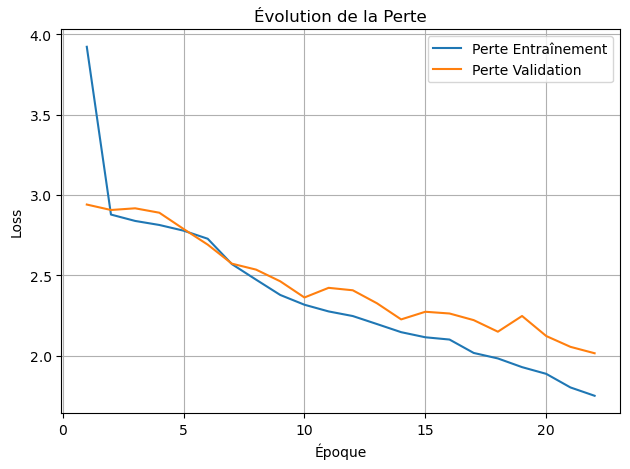

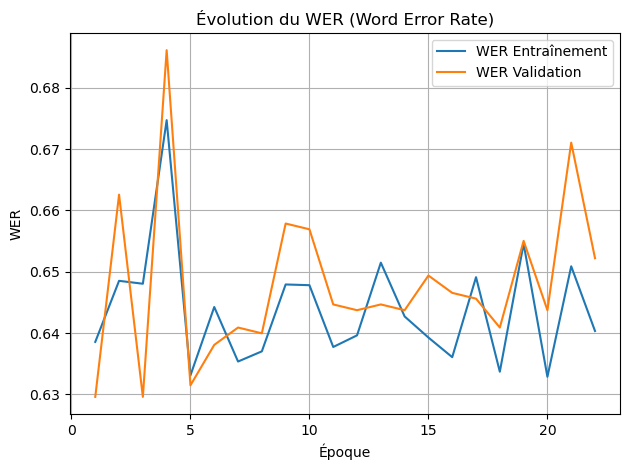

In [24]:
import matplotlib.pyplot as plt
epochs = list(range(1, len(train_losses) + 1))

# 📉 Courbe des pertes (Loss)
plt.figure()
plt.plot(epochs, train_losses, label='Perte Entraînement')
plt.plot(epochs, val_losses, label='Perte Validation')
plt.title("Évolution de la Perte")
plt.xlabel("Époque")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧠 Courbe du Word Error Rate (WER)
plt.figure()
plt.plot(epochs, wer_train, label='WER Entraînement')
plt.plot(epochs, wer_val, label='WER Validation')
plt.title("Évolution du WER (Word Error Rate)")
plt.xlabel("Époque")
plt.ylabel("WER")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 9.evaluation

In [25]:
def evaluate_model(model, loader, vocab_inv):
    model.eval()
    predictions, references = [], []
    with torch.no_grad():
        for mel, target, input_lens, target_lens in loader:
            out = model(mel).log_softmax(2)
            pred = out.argmax(2)
            for i in range(len(mel)):
                pred_seq = pred[i][:input_lens[i]].tolist()
                decoded = [vocab_inv[p] for p in pred_seq if p in vocab_inv and p != 0]
                ref = [vocab_inv[t.item()] for t in target[:target_lens[i]]]
                predictions.append(" ".join(decoded))
                references.append(" ".join(ref))

    wer = jiwer.wer(references, predictions)
    cer = jiwer.cer(references, predictions)
    ser = sum([r != p for r, p in zip(references, predictions)]) / len(references)
    return wer, cer, ser


In [30]:
from jiwer import wer, cer

# Charger le meilleur modèle
model.load_state_dict(torch.load("best_model_BiGRU_CTC2.pt"))
model.eval()

all_preds = []
all_refs = []

with torch.no_grad():
    for mel, target, input_lens, target_lens in test_loader:
        mel = mel.to(device)
        output = model(mel).log_softmax(2)
        pred = output.argmax(2)  # [B, T]
        pred = pred.cpu()

        for i in range(len(mel)):
            pred_seq = pred[i][:input_lens[i]].tolist()
            decoded_pred = [vocab_inv.get(p, "") for p in pred_seq if p != 0]
            ref_seq = target[:target_lens[i]]
            decoded_ref = [vocab_inv.get(t.item(), "") for t in ref_seq]
            all_preds.append(" ".join(decoded_pred))
            all_refs.append(" ".join(decoded_ref))

# Évaluation
print(f"WER : {wer(all_refs, all_preds):.4f}")
print(f"CER : {cer(all_refs, all_preds):.4f}")
print(f"SER : {sum(p != r for p, r in zip(all_preds, all_refs)) / len(all_preds):.4f}")


WER : 0.6207
CER : 0.4825
SER : 0.9821


In [32]:
from jiwer import wer, cer

# Charger le meilleur modèle
model.load_state_dict(torch.load("best_model_BiGRU_CTC2.pt"))
model = model.to(device)
model.eval()

all_preds = []
all_refs = []

with torch.no_grad():
    for mel, target, input_lens, target_lens in test_loader:
        mel = mel.to(device)
        output = model(mel).log_softmax(2)
        pred = output.argmax(2)  # [B, T]
        pred = pred.cpu()

        # target est concaténé, on utilise un pointeur
        start = 0
        for i in range(len(mel)):
            pred_seq = pred[i][:input_lens[i]].tolist()
            decoded_pred = [vocab_inv.get(p, "") for p in pred_seq if p != 0]

            t_len = target_lens[i]
            ref_seq = target[start:start + t_len]
            decoded_ref = [vocab_inv.get(t.item(), "") for t in ref_seq]

            all_preds.append(" ".join(decoded_pred))
            all_refs.append(" ".join(decoded_ref))

            start += t_len

# Évaluation
print(f"WER : {wer(all_refs, all_preds):.4f}")
print(f"CER : {cer(all_refs, all_preds):.4f}")
print(f"SER : {sum(p != r for p, r in zip(all_preds, all_refs)) / len(all_preds):.4f}")


WER : 0.5247
CER : 0.3731
SER : 0.9524


# 10. Visualisation

In [33]:
# Adaptation du YembaSataset et collate_fn pour qu'iol retourne aussi les chemins des fichiers

class YembaDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        mel = extract_melspectrogram(row["audio_path"])
        label = torch.tensor(row["encoded"], dtype=torch.long)
        return mel, label, row["audio_path"]



def collate_fn(batch):
    mels, labels, paths = zip(*batch)
    input_lengths = [mel.shape[0] for mel in mels]
    label_lengths = [len(label) for label in labels]

    mels_padded = nn.utils.rnn.pad_sequence(mels, batch_first=True)  # [B, T, F]
    labels_cat = torch.cat(labels)

    return mels_padded, labels_cat, torch.tensor(input_lengths), torch.tensor(label_lengths), list(paths)

test_loader = DataLoader(
    YembaDataset(test), 
    batch_size=8, 
    collate_fn=collate_fn
)


In [34]:
import pandas as pd

# Évaluation + collecte des résultats avec noms de fichiers
results = []

model.eval()
with torch.no_grad():
    for mel, target, input_lens, target_lens, paths in test_loader:
        mel = mel.to(device)
        output = model(mel).log_softmax(2)
        pred = output.argmax(2).cpu()

        start = 0
        for i in range(len(mel)):
            pred_seq = pred[i][:input_lens[i]].tolist()
            decoded_pred = [vocab_inv.get(p, "") for p in pred_seq if p != 0]

            t_len = target_lens[i]
            ref_seq = target[start:start + t_len]
            decoded_ref = [vocab_inv.get(t.item(), "") for t in ref_seq]

            results.append({
                "fichier_audio": paths[i],
                "prediction": " ".join(decoded_pred),
                "reference": " ".join(decoded_ref)
            })

            start += t_len

# Création du DataFrame
df_resultats = pd.DataFrame(results)


In [35]:
df_resultats.head(20)


,fichier_audio,prediction,reference
0,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_5/group_79/spkr_5_group_79_statement_3.wav,n|haut chʉ́ ∅|∅,N|bas tí |haut ∅|∅
1,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_49/spkr_11_group_49_statement_1.wav,n|haut tshɛ́|haut ∅|∅,n|bas tshɛ|bas ∅|∅
2,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_3/group_111/spkr_3_group_111_statement_1.wav,a|bas lɔ̄'|moyen ∅|∅,a|bas kem|bas ∅|∅
3,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_8/group_36/spkr_8_group_36_statement_2.wav,n|haut tɔ́ŋ|haut ∅|∅,n|bas tɔ̄ŋ|moyen ∅|∅
4,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_76/spkr_1_group_76_statement_1.wav,n|haut tswhī|moyen ∅|∅,N|haut chʉ̄ |moyen ∅|∅
5,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_20/spkr_1_group_20_statement_2.wav,n|bas deŋ|bas ∅|∅,m|bas bɛ̄|moyen ∅|∅
6,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_4/group_15/spkr_4_group_15_statement_2.wav,m|bas bēŋ|moyen ∅|∅,m|haut bǝ̄|moyen ∅|∅
7,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_8/group_121/spkr_8_group_121_statement_2.wav,Le|bas fāŋ|moyen ∅|∅,Le|bas kwɛ̄|moyen ∅|∅
8,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_48/spkr_9_group_48_statement_2.wav,n|haut tswhī|moyen ∅|∅,n|haut tshí|haut ∅|∅
9,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_7/group_70/spkr_7_group_70_statement_2.wav,Le|bas pē|moyen ∅|∅,Le|bas whʉ |bas ∅|∅


In [36]:
def analyse_erreurs(predictions, references):
    for ref, pred in zip(references, predictions):
        if ref != pred:
            print(f"\nRef : {ref}\nPred: {pred}")


In [37]:
for i, (ref, pred) in enumerate(zip(all_refs, all_preds)):
    if ref != pred:
        print(f"\n🔴 Sample {i}")
        print(f"Référence : {ref}")
        print(f"Prédit     : {pred}")



🔴 Sample 0
Référence : N|bas tí |haut ∅|∅
Prédit     : n|haut chʉ́ ∅|∅

🔴 Sample 1
Référence : n|bas tshɛ|bas ∅|∅
Prédit     : n|haut tshɛ́|haut ∅|∅

🔴 Sample 2
Référence : a|bas kem|bas ∅|∅
Prédit     : a|bas lɔ̄'|moyen ∅|∅

🔴 Sample 3
Référence : n|bas tɔ̄ŋ|moyen ∅|∅
Prédit     : n|haut tɔ́ŋ|haut ∅|∅

🔴 Sample 4
Référence : N|haut chʉ̄ |moyen ∅|∅
Prédit     : n|haut tswhī|moyen ∅|∅

🔴 Sample 5
Référence : m|bas bɛ̄|moyen ∅|∅
Prédit     : n|bas deŋ|bas ∅|∅

🔴 Sample 6
Référence : m|haut bǝ̄|moyen ∅|∅
Prédit     : m|bas bēŋ|moyen ∅|∅

🔴 Sample 7
Référence : Le|bas kwɛ̄|moyen ∅|∅
Prédit     : Le|bas fāŋ|moyen ∅|∅

🔴 Sample 8
Référence : n|haut tshí|haut ∅|∅
Prédit     : n|haut tswhī|moyen ∅|∅

🔴 Sample 9
Référence : Le|bas whʉ |bas ∅|∅
Prédit     : Le|bas pē|moyen ∅|∅

🔴 Sample 10
Référence : Le|bas pfū' |moyen ∅|∅
Prédit     : Le|bas zɔŋ|bas ∅|∅

🔴 Sample 11
Référence : m|haut bēŋ|moyen ∅|∅
Prédit     : n|bas deŋ|bas ∅|∅

🔴 Sample 12
Référence : le|bas whʉ̄ |moyen ∅|∅
Prédit 